In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0,nan,0,12,18,405,99,291,15,0.000


In [3]:
df.drop(['Rape\n(revised\ndefinition)1'], inplace=True, axis=1)
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0,0,12,18,405,99,291,15,0.000


In [4]:
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].fillna(0)
df['Population'] = df['Population'].apply(int)

In [5]:
df['Violent\ncrime'] = df['Violent\ncrime'].str.replace(',', '')
df['Violent\ncrime'] = df['Violent\ncrime'].fillna(0)
df['Violent\ncrime'] = df['Violent\ncrime'].apply(int)

In [6]:
df['Murder and\nnonnegligent\nmanslaughter'] = df['Murder and\nnonnegligent\nmanslaughter'].fillna(0)
df['Murder and\nnonnegligent\nmanslaughter'] = df['Murder and\nnonnegligent\nmanslaughter'].apply(int)

In [7]:
df['Rape\n(legacy\ndefinition)2'] = df['Rape\n(legacy\ndefinition)2'].str.replace(',', '')
df['Rape\n(legacy\ndefinition)2'] = df['Rape\n(legacy\ndefinition)2'].fillna(0)
df['Rape\n(legacy\ndefinition)2'] = df['Rape\n(legacy\ndefinition)2'].apply(int)

In [8]:
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Robbery'] = df['Robbery'].fillna(0)
df['Robbery'] = df['Robbery'].apply(int)

In [9]:
df['Aggravated\nassault'] = df['Aggravated\nassault'].str.replace(',', '')
df['Aggravated\nassault'] = df['Aggravated\nassault'].fillna(0)
df['Aggravated\nassault'] = df['Aggravated\nassault'].apply(int)

In [10]:
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].fillna(0)
df['Property\ncrime'] = df['Property\ncrime'].apply(int)

In [11]:
df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Burglary'] = df['Burglary'].fillna(0)
df['Burglary'] = df['Burglary'].apply(int)

In [12]:
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].str.replace(',', '')
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].fillna(0)
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].apply(int)

In [13]:
df['Arson3'] = df['Arson3'].fillna(0)
df['Arson3'] = df['Arson3'].apply(int)

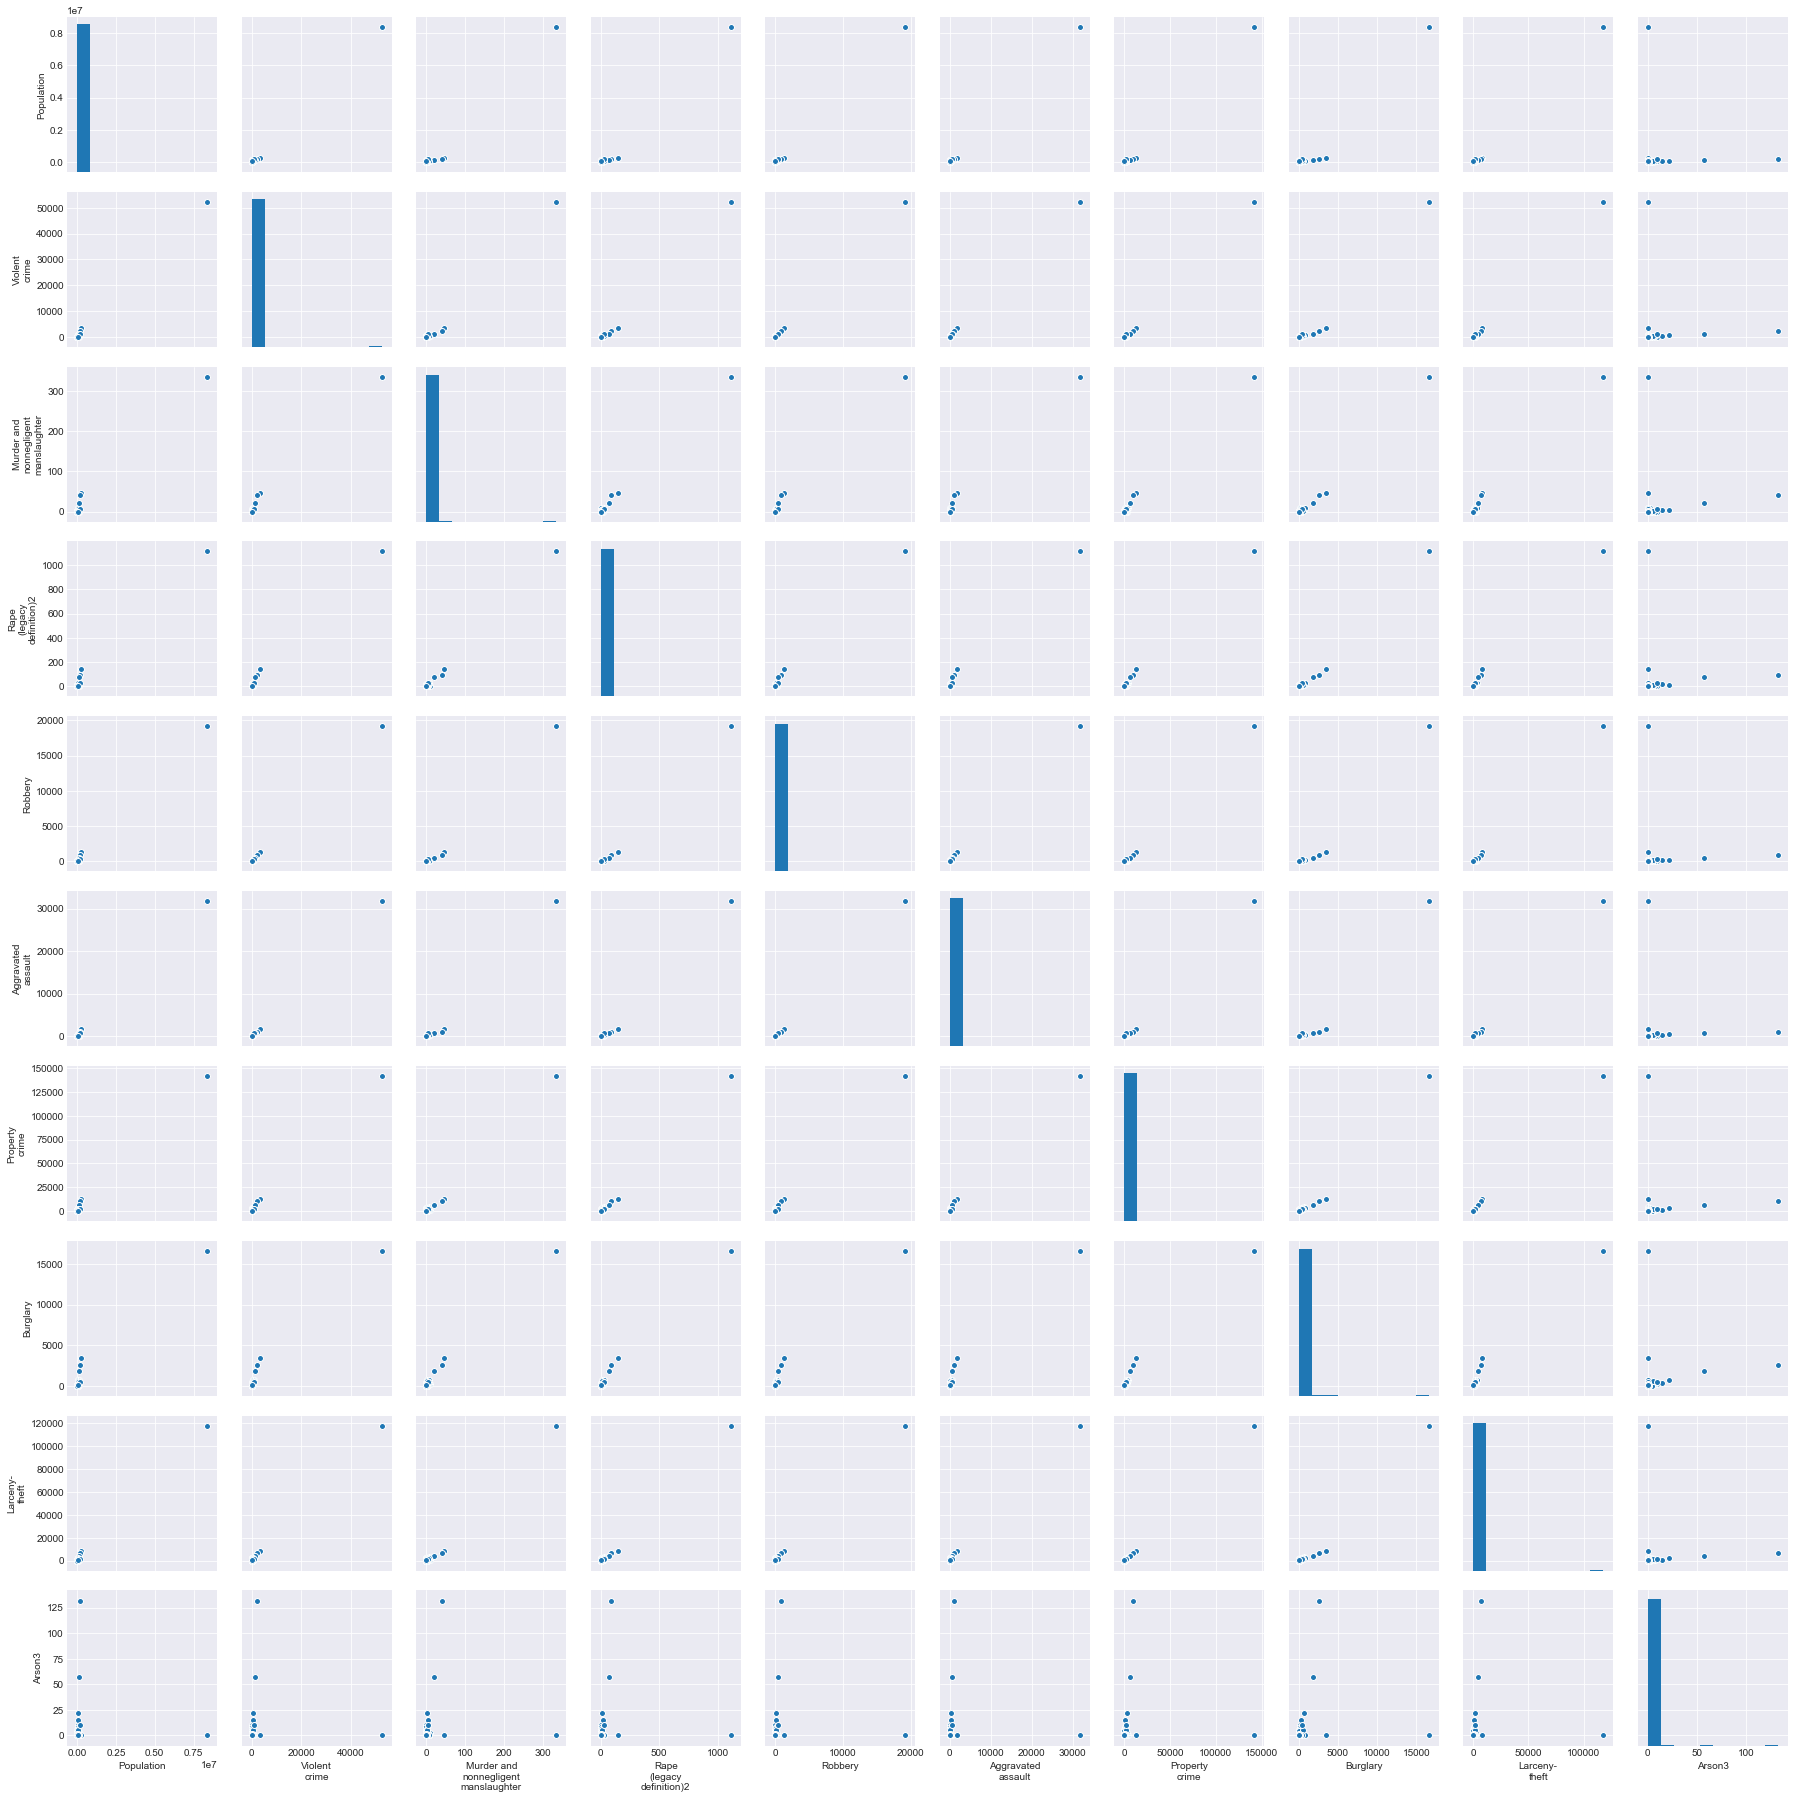

In [14]:
sns.set_style('darkgrid')
sns.pairplot(df)
plt.show()

In [15]:
#df['Population'].sort_values(ascending=False)

In [16]:
#df.loc[216]

In [17]:
df.drop([216], inplace=True)

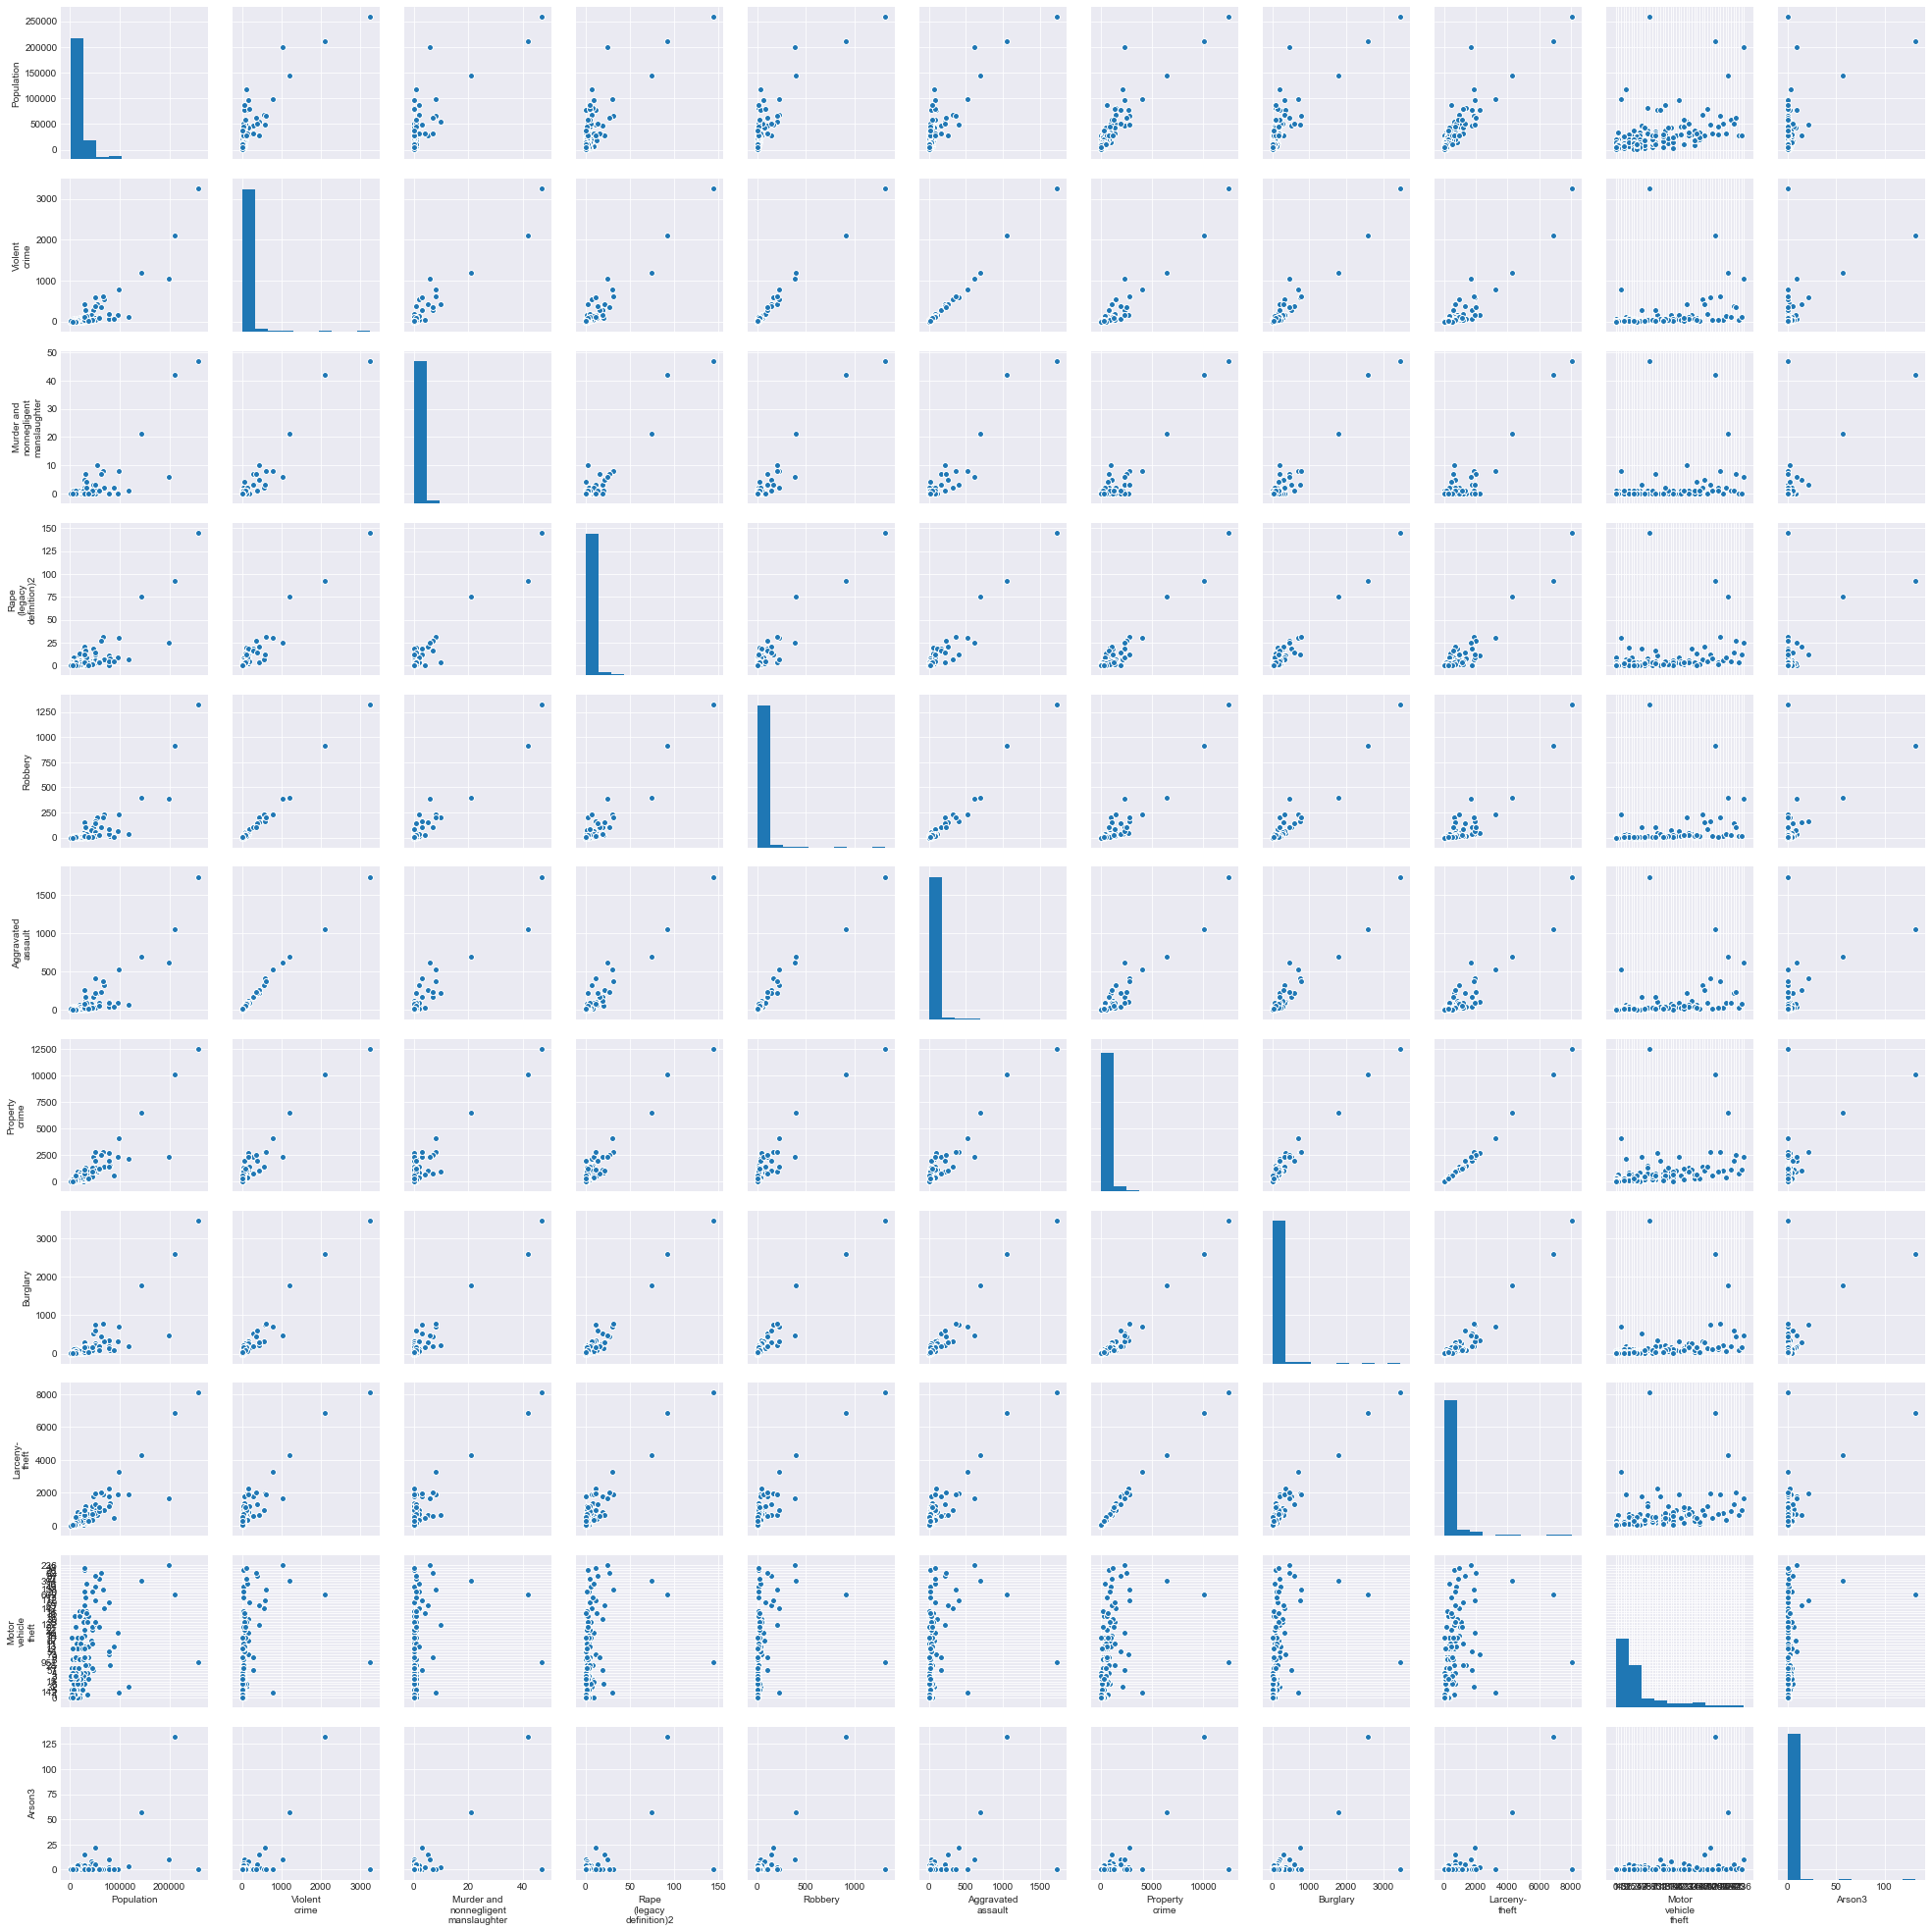

In [18]:
sns.pairplot(df)
plt.show()

(array([ 8., 31., 59., 57., 71., 48., 44., 17.,  8.,  4.]),
 array([ 6.26530121,  6.88514793,  7.50499464,  8.12484135,  8.74468806,
         9.36453477,  9.98438149, 10.6042282 , 11.22407491, 11.84392162,
        12.46376834]),
 <a list of 10 Patch objects>)

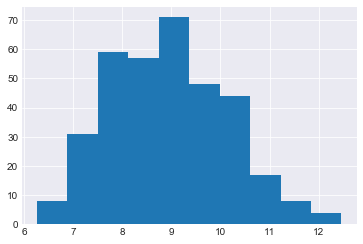

In [19]:
plt.hist(np.log(df['Population']))

(array([82., 68., 57., 62., 39., 19.,  8.,  7.,  3.,  2.]),
 array([0.        , 0.80864103, 1.61728206, 2.42592308, 3.23456411,
        4.04320514, 4.85184617, 5.66048719, 6.46912822, 7.27776925,
        8.08641028]),
 <a list of 10 Patch objects>)

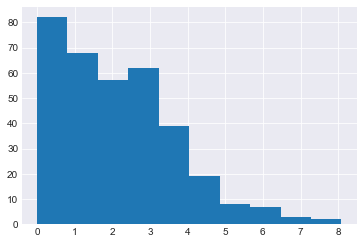

In [20]:
plt.hist(np.log(df['Violent\ncrime']+1))

(array([32., 37., 58., 87., 58., 40., 21.,  8.,  3.,  3.]),
 array([0.        , 0.81487348, 1.62974696, 2.44462044, 3.25949392,
        4.0743674 , 4.88924089, 5.70411437, 6.51898785, 7.33386133,
        8.14873481]),
 <a list of 10 Patch objects>)

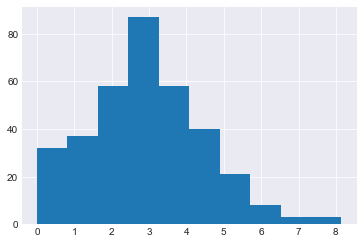

In [21]:
plt.hist(np.log(df['Burglary']+1))

(array([337.,   6.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <a list of 10 Patch objects>)

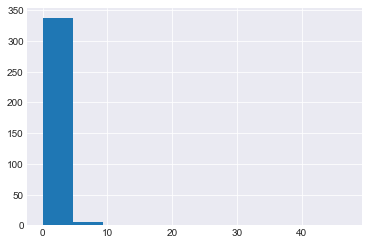

In [22]:
plt.hist(df['Murder and\nnonnegligent\nmanslaughter'])

(array([ 9.,  9., 26., 51., 70., 75., 61., 32., 11.,  3.]),
 array([0.        , 0.89967758, 1.79935516, 2.69903274, 3.59871032,
        4.4983879 , 5.39806548, 6.29774306, 7.19742064, 8.09709822,
        8.9967758 ]),
 <a list of 10 Patch objects>)

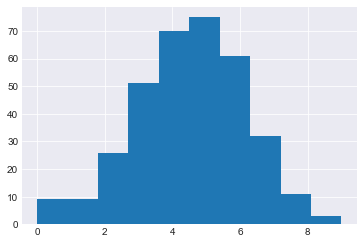

In [23]:
plt.hist(np.log(df['Larceny-\ntheft']+1))

(array([ 9.,  7., 24., 54., 76., 73., 63., 27., 11.,  3.]),
 array([0.        , 0.94328437, 1.88656874, 2.82985312, 3.77313749,
        4.71642186, 5.65970623, 6.6029906 , 7.54627497, 8.48955935,
        9.43284372]),
 <a list of 10 Patch objects>)

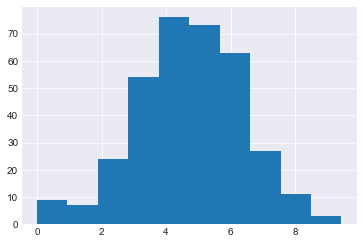

In [24]:
plt.hist(np.log(df['Property\ncrime']+1))

(array([100.,  56.,  65.,  60.,  33.,  15.,   6.,   6.,   4.,   2.]),
 array([0.        , 0.74593389, 1.49186778, 2.23780167, 2.98373556,
        3.72966945, 4.47560334, 5.22153723, 5.96747112, 6.71340501,
        7.4593389 ]),
 <a list of 10 Patch objects>)

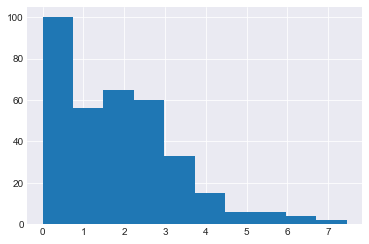

In [25]:
plt.hist(np.log(df['Aggravated\nassault']+1))

In [26]:
df.loc[1]

City                                      Addison Town and Village
Population                                                    2577
Violent\ncrime                                                   3
Murder and\nnonnegligent\nmanslaughter                           0
Rape\n(legacy\ndefinition)2                                      0
Robbery                                                          0
Aggravated\nassault                                              3
Property\ncrime                                                 24
Burglary                                                         3
Larceny-\ntheft                                                 20
Motor\nvehicle\ntheft                                            1
Arson3                                                           0
Name: 1, dtype: object

In [27]:
#g = sns.PairGrid(df, diag_sharey=False)
#g.map_upper(plt.scatter, alpha=.5)
#g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#g.map_diag(sns.kdeplot, lw=3)
#plt.show()

In [28]:
df2 = pd.DataFrame()
df2['population_log'] = (np.log(df['Population']))
df2['murder'] = np.where(df.iloc[:, 3]>=1, 1, 0)
df2['robbery'] = np.where(df.iloc[:, 3]>=1, 1, 0)
df2['larceny'] = np.log(df['Larceny-\ntheft']+1)
df2['burglary'] = np.log(df['Burglary']+1)
df2['property_crime'] = np.log(df['Property\ncrime']+1)

In [29]:
df2

,population_log,murder,robbery,larceny,burglary,property_crime
0,7.529,0,0,2.398,1.099,2.565
1,7.854,0,0,3.045,1.386,3.219
2,7.954,0,0,2.773,0.693,2.833
3,11.492,1,1,8.085,6.560,8.317
4,8.762,0,0,5.112,3.989,5.412
5,8.316,0,0,3.611,2.398,3.850
6,7.485,0,0,2.398,0.000,2.398
7,11.681,1,1,7.541,5.323,7.659
8,9.161,0,0,5.242,2.833,5.352
9,9.808,0,0,5.677,4.605,6.006


In [30]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df2['property_crime'].values.reshape(-1, 1)
X = df2[['population_log','murder','robbery','burglary','larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.01763565 -0.00848192 -0.00848192  0.16719558  0.87203982]]

Intercept: 
 [0.4536435]

R-squared:
0.9978558130125297


In [31]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population_log,murder,robbery,burglary,larceny
population_log,1.000,0.489,0.489,0.846,0.860
murder,0.489,1.000,1.000,0.510,0.460
robbery,0.489,1.000,1.000,0.510,0.460
burglary,0.846,0.510,0.510,1.000,0.920
larceny,0.860,0.460,0.460,0.920,1.000


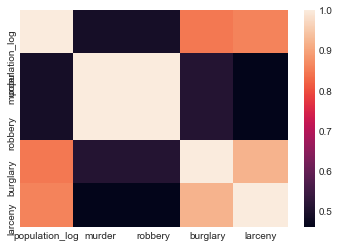

In [32]:
sns.heatmap(correlation_matrix)

The heatmap shows a low correlation between property crime and the features of murder and robbery. They are being dropped.  The population, burglary, and larceny are highly correlated.  Using a principal component analysis could reduce complexity and help prevent overfitting.

In [33]:
# Without murder and robbery
regr = linear_model.LinearRegression()
Y = df2['property_crime'].values.reshape(-1, 1)
X = df2[['population_log','burglary','larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.01891975  0.16536396  0.87276188]]

Intercept: 
 [0.46492907]

R-squared:
0.9978466768899781


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([0.99896346, 0.99891852, 0.99614798, 0.99744067, 0.99838791,
       0.99652977, 0.9978505 , 0.9973804 , 0.99708019, 0.99747518])

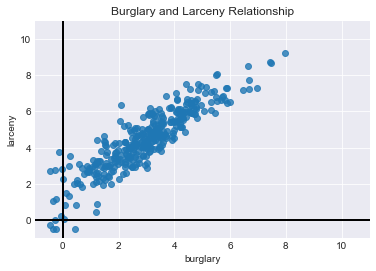

In [35]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

t = sns.regplot(
    'burglary',
    'larceny',
    df2,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Burglary and Larceny Relationship')
plt.show()

Covariance Matrix:
 [[1.00289017 0.84877462 0.8622635 ]
 [0.84877462 1.00289017 0.92266536]
 [0.8622635  0.92266536 1.00289017]]
Eigenvector 1: 
[[0.56733055]
 [0.58086539]
 [0.58372206]]
Eigenvalue 1: 2.7590903607982304
----------------------------------------
Eigenvector 2: 
[[ 0.82026019]
 [-0.46132847]
 [-0.33815568]]
Eigenvalue 2: 0.17005298356887477
----------------------------------------
Eigenvector 3: 
[[-0.07286468]
 [-0.67065002]
 [ 0.73818649]]
Eigenvalue 3: 0.07952717586410736
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.91704636 0.05652097 0.02643266]


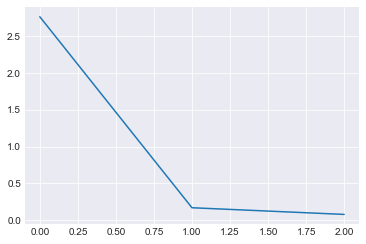

In [36]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df2[['population_log','burglary','larceny']])

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

plt.plot(eig_val_cov)
plt.show()

In [37]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.91704636]


In [38]:
# Using PCA values
regr.fit(Y_sklearn, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Y_sklearn, Y))




Coefficients: 
 [[0.96827268]]

Intercept: 
 [4.71195847]

R-squared:
0.9508770285705014


In [39]:
cross_val_score(regr, Y_sklearn, Y, cv=10)

array([0.98464858, 0.96650029, 0.87478872, 0.95431381, 0.95401768,
       0.93237576, 0.96106707, 0.94707954, 0.93852181, 0.93917259])

# Final Model
The use of the principal component analysis resulted in a model that shows less accuracy than the model before using PCA, but that is likely because it was overfitting.  The features I ended up using (population, burglary, larceny) were all transformed using the a log transformation.  These ended up being more accurate than the beginning features (population squared, murder, robbery).